In [1]:
from icecube import icetray, dataio, dataclasses, simclasses

import numpy as np
import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize
import matplotlib.pyplot as plt
import timeit as time
import math
from datetime import datetime

In [2]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['hist.bins'] = 100
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

In [3]:
#is there light from 1/r

fr_arr = []; mctree_arr = []
start_time = datetime.now()
for i in range(1, 3):
    pth = '/data/icecube/domeff_analysis/reco_sim_nominal/0000000-0000999/' + str(i) + '.i3.bz2' # path to i3 file
    with dataio.I3File('/data/icecube/domeff_analysis/reco_sim_nominal/0000000-0000999/'+ str(i) + '.i3.bz2') as f:
        for fr in f:
            if f.stream.id != 'P': continue
            fr_arr.append( fr )
            mctree_arr.append( fr['I3MCTree'] )
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:21.395649


In [4]:
def path_len(pos1, pos2):                                  
    return np.sqrt((pos2.x-pos1.x)**2+(pos2.y-pos1.y)**2+(pos2.z-pos1.z)**2)

def path_len_mmc(mmc_tr):                                  
    return np.sqrt((mmc_tr.xf-mmc_tr.xi)**2+(mmc_tr.yf-mmc_tr.yi)**2+(mmc_tr.zf-mmc_tr.zi)**2)

def r_len_mmc(mmc_tr):                                  
    return np.sqrt((mmc_tr.xi)**2+(mmc_tr.yi)**2)

In [5]:
mmc_Ei = []; mmc_Ef = []
mmc_path = []; mmc_r = []


for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mmc_tr = fr['MMCTrackList'][i]                              
    
        mmc_Ei.append( mmc_tr.Ei / icetray.I3Units.GeV )
        mmc_Ef.append( mmc_tr.Ef / icetray.I3Units.GeV )
        mmc_path.append( path_len_mmc(mmc_tr) )
        mmc_r.append( r_len_mmc(mmc_tr))

mmc_Ei = np.array(mmc_Ei); mmc_Ef = np.array(mmc_Ef)
mmc_path = np.array(mmc_path)

print(len(mmc_Ei)); print(len(mmc_Ef)); print(len(mmc_path))

#print(mmc_r) #calculate r=sqrt(xi^2 + yi^2)

4849
4849
4849


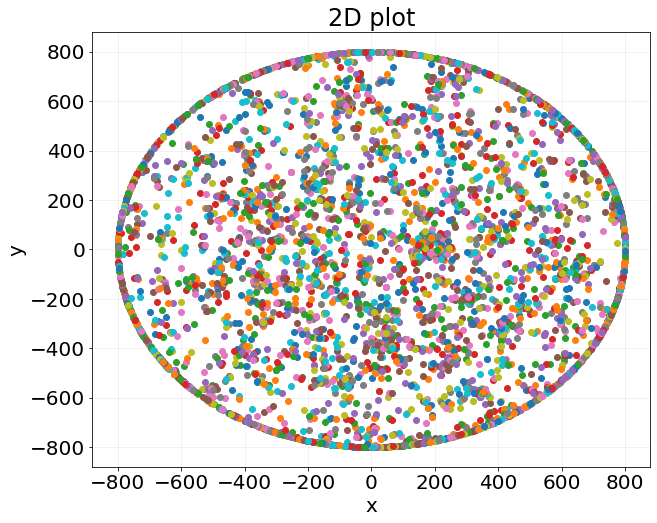

In [6]:
fig = plt.figure(1, figsize=(10, 8)) #plot of each one
ax = plt.gca()
ax.set_title('2D plot')
ax.set_ylabel('y')
ax.set_xlabel('x')


for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mmc_tr = fr['MMCTrackList'][i]                              
        plt.plot(mmc_tr.xi,mmc_tr.yi,'o') 

ax.grid()
#plt.legend(loc=2,
#           fontsize = 16)
plt.show()

In [53]:
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = plt.axes(projection='3d')


#for fr in fr_arr:
#    for i in range(len(fr['MMCTrackList'])):
#        mmc_tr = fr['MMCTrackList'][i]
        
#ax.plot3D(mmc_tr.xi, mmc_tr.yi, np.sqrt((mmc_tr.xi)**2+(mmc_tr.yi)**2), 'gray')
        #print(mmc_tr.xi)
        
        

#ax.legend(loc=2,
#           fontsize = 16)
#plt.show()

In [7]:
number_of_events = 0
#how many events are there when E(initial)/r = E(final)
for i in range(len(mmc_Ei)):
 if (mmc_Ei[i]/mmc_path[i]) == mmc_Ef[i]:
    number_of_events += 1
print(number_of_events)
#there are no events 
print((mmc_Ei[i]-mmc_Ef[i])/mmc_path[i])

0
0.8506452400666016


In [209]:
number_of_events = 0
#how many events are there when E(initial)/r = E(final) +-error (let error be approximately 3% of Energies value)
for i in range(len(mmc_Ei)):
 if ((mmc_Ei[i]/mmc_path[i]) <= mmc_Ef[i]+100) & ((mmc_Ei[i]/mmc_path[i]) >= mmc_Ef[i]-100):
    number_of_events += 1
print(number_of_events)


474


In [74]:
        
mmc_Elost = []


for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mmc_tr = fr['MMCTrackList'][i]                              
    
        mmc_Elost.append( mmc_tr.Elost / icetray.I3Units.GeV )
        
mmc_Elost = np.array(mmc_Elost)
print(len(mmc_Elost))



4849


/home/users/sstesnyash/jupyter_py3-4.1.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


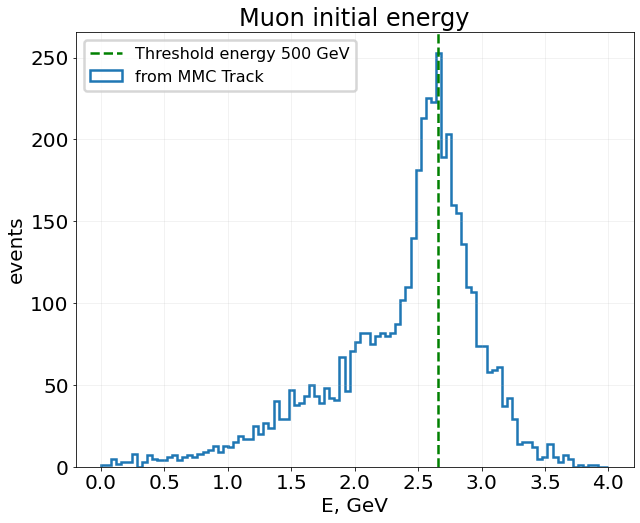

In [75]:
#At muon energies >∼ 600 GeV, radiative energy losses dominate over continuous energy loss due to ionization.
#Consider energies only <600GeV
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Muon initial energy')
ax.set_ylabel('events')
ax.set_xlabel('E, GeV')
#ax.set_yscale('log')

plt.hist(np.log10(mmc_Ei), 100, range=[0.,4.], 
         histtype='step', label='from MMC Track') 

ax.axvline(np.log10(450.), c='g', linestyle='--', label='Threshold energy 500 GeV')

ax.grid()
plt.legend(loc=2,
           fontsize = 16)
plt.show()

/home/users/sstesnyash/jupyter_py3-4.1.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


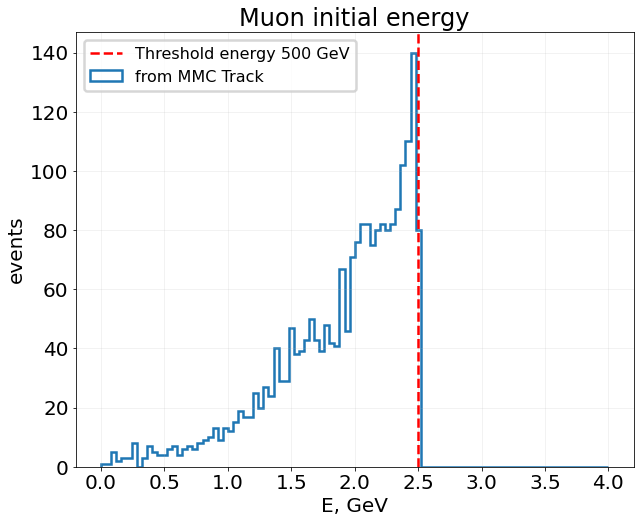

In [49]:
#Select low energy muons (consider low-energy range before peak(2.65 GeV), and cut region after 2.5 GeV)
en_cut = (mmc_Ei<316.)

fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Muon initial energy')
ax.set_ylabel('events')
ax.set_xlabel('E, GeV')
#ax.set_yscale('log')

plt.hist(np.log10(mmc_Ei[en_cut]), 100, range=[0.,4.], 
         histtype='step', label='from MMC Track') 

ax.axvline(np.log10(316.), c='r', linestyle='--', label='Threshold energy 500 GeV')

ax.grid()
plt.legend(loc=2,
           fontsize = 16)
plt.show()

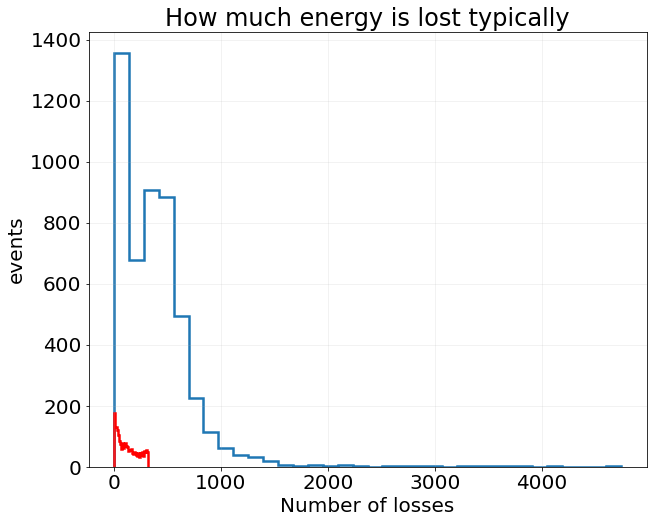

In [53]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('How much energy is lost typically')
ax.set_ylabel('events')
ax.set_xlabel('Number of losses')

plt.hist(mmc_Elost, 34, histtype='step') #energy losses before cut region more than 2.5 GeV
plt.hist(mmc_Elost[en_cut], 34, histtype='step',color = "red") #energy losses after cut region more than 2.5 GeV

ax.grid()
plt.show()

In [54]:
stochastics = []

for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mu = fr['MMCTrackList'][i].GetI3Particle()                              
        mctree = fr['I3MCTree']
    
        daughters = mctree.get_daughters(mu)
        #print(len(daughters))
        stochastics.append( len(daughters) )
        
stochastics = np.array(stochastics)
#print(len(stochastics))
#print(len(stochastics[en_cut]))

In [55]:
len(stochastics) == len(en_cut)

True

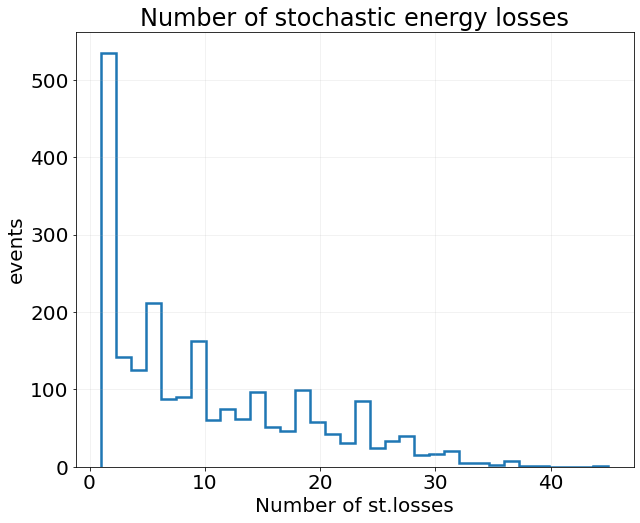

In [56]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Number of stochastic energy losses')
ax.set_ylabel('events')
ax.set_xlabel('Number of st.losses')

plt.hist(stochastics[en_cut], 34, histtype='step') 

ax.grid()
plt.show()
#print(len(stochastics[en_cut]))

In [57]:
#consider muons only with no stochastic losses. How many are them?
stoch_cut = (stochastics[en_cut] == 0)

In [58]:
#how many did we ended with?

print('Number of muons after energy cut (290GeV)', len(stochastics[en_cut]))
print( 'Number of muons of 0 stochastics cut', len(stochastics[en_cut][stoch_cut]))

percent = (1. - float(len(stochastics[en_cut][stoch_cut]))/float(len(stochastics[en_cut])))*100.
print(percent, '% of muons will remain if from all amount of them cut muons, those have 0 stoch. energy')

Number of muons after energy cut (290GeV) 2234
Number of muons of 0 stochastics cut 0
100.0 % of muons will remain if from all amount of them cut muons, those have 0 stoch. energy


In [59]:
#there are no muons with 0 stochastic losses


In [60]:
#consider maximum energy of stochastic losses and cut on this
max_stoch_energy = []

for fr in fr_arr: 
    for i in range(len(fr['MMCTrackList'])):
        mu = fr['MMCTrackList'][i].GetI3Particle()                              
        mctree = fr['I3MCTree']
    
        daughters = mctree.get_daughters(mu)
        #if len(daughters) == 0:
         #   print(len(daughters), "Bt")
        en = []
        if len(daughters) != 0:
            for d in daughters:
                en.append(d.energy)           
            max_stoch_energy.append( max(en) )
        else: 
            max_stoch_energy.append( 0 )
        
max_stoch_energy = np.array(max_stoch_energy)
#print(len(max_stoch_energy))
#print(len(en_cut))

In [61]:
len(max_stoch_energy) == len(en_cut)

True

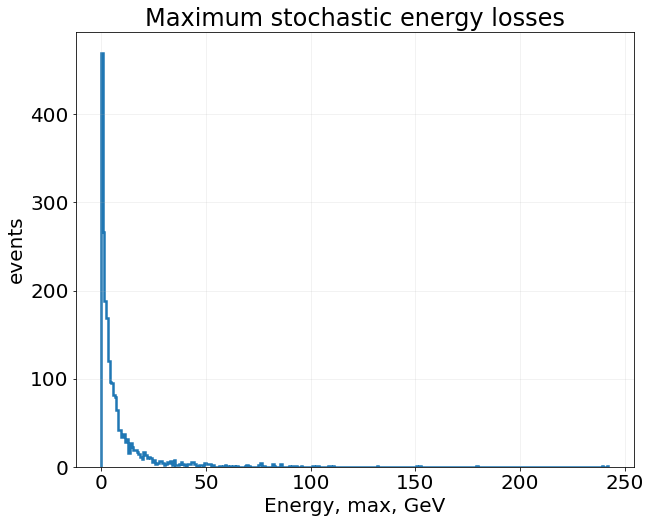

In [62]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.gca()
ax.set_title('Maximum stochastic energy losses')
ax.set_ylabel('events')
ax.set_xlabel('Energy, max, GeV')

plt.hist(max_stoch_energy[en_cut], 300, histtype='step') 

ax.grid()
plt.show()

In [64]:
max_stoch_en_cut = (max_stoch_energy[en_cut] <= 0.8)

In [65]:
print( 'Number muons after energy cut', len(max_stoch_energy[en_cut]))
print ('Number muons of max stochastic en. loss cut', len(max_stoch_energy[en_cut][max_stoch_en_cut]))

percent = (100. - 100.*float(len(max_stoch_energy[en_cut][max_stoch_en_cut]))/float(len(max_stoch_energy[en_cut])))
#print ('% of muons cut by "max stochastic en. loss cut"', percent, '%')
#print(len(max_stoch_energy[en_cut][max_sthoc_en_cut]))
#print(len(max_stoch_energy[en_cut]))
print(percent, '% of muons will remain if from all amount of them cut muons, those less than maximal stoch. energy')

Number muons after energy cut 2234
Number muons of max stochastic en. loss cut 465
79.18531781557743 % of muons will remain if from all amount of them cut muons, those less than maximal stoch. energy


In [93]:
#for fr in fr_arr:     # First Example
 #   if fr['VolumeTrigTriggered'] == True:
  #      print('fals
        

In [96]:
#from icecube.icetray import I3Units
#from icecube.MuonGun import load_model, StaticSurfaceInjector, Cylinder, OffsetPowerLaw
#from icecube.MuonGun.segments import GenerateBundles

# Use Hoerandel as a template for generating muons
#model = load_model('Hoerandel5_atmod12_SIBYLL')
# Generate only single muons, no bundles
#model.flux.max_multiplicity = 1
# Center the sampling surface on the barycenter of IC79 strings
#surface = Cylinder(1600*I3Units.m, 800*I3Units.m, dataclasses.I3Position(31.25, 19.64, 0))
# Draw energies from an E^-2 power law broken at 1 TeV, from 10 TeV to 10 PeV
#spectrum = OffsetPowerLaw(2, 1*I3Units.TeV, 10*I3Units.TeV, 10*I3Units.PeV)
# Set up the generator. This gets stored in a special frame for later reference
#generator = StaticSurfaceInjector(surface, model.flux, spectrum, model.radius)

